# Interpolation Polynomiale

Les interets de cec i cest des bonnes bases pour le smethodes  de integration et cest utilise dans les methodes des elements finie etc.

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

## 2.1 Interpolation par collocation
Le polynome $P(x)$ passe par tout les points : $P(x_j) = f_j \; \forall j \in [0, n]$
### a) Developement en puissance de x
$$
    \begin{bmatrix} 
        a_0 & a_1 x_0 &  a_2 x_0^2 & ... & a_n x_0^n \\ 
        a_0 & a_1 x_1 &            & ... & a_n x_1^n \\
         :  &         &            &     &           \\ 
        a_0 & a_1 x_n &            & ... & a_n xn^n 
    \end{bmatrix} = \begin{bmatrix} f_0\\ f_1\\ : \\ f_n  \end{bmatrix}
    \Leftrightarrow
    \begin{bmatrix} 
        1 & x_0 &  x_0^2 & ... & x_0^n \\ 
        1 & x_1 &        & ... & x_1^n \\
         :&     &        &     &       \\ 
        1 & x_n & x_n^2  & ... & xn^n 
    \end{bmatrix} 
    \begin{bmatrix} 
        a_0\\ a_1\\ : \\ a_n 
    \end{bmatrix} = \begin{bmatrix} f_0\\ f_1\\ : \\ f_n  \end{bmatrix}
$$

La matrice cree est de Vandermonde; $V_{i,j} = x_i^{j-1}$ 

Determinant dunne matrice caree de Vandermonde est apelle Vandermonde polynomial (ou Vandermonde determinant) $$\det (V) = \prod_{1\leq i <j \leq n}^{} (x_j-x_i) $$
$\det(V) \neq 0$ si et seulement si tout $x_i$ sont distincts

Le polynome interpole de $f(x)$ defini par $(n+1)$ points donne est de degree $\leq n $ et est UNIQUE si les x sont differentes 

In [14]:
#elimination de gauss 
# M matrice (n+1)*n car le +1 cest les solutions 
def ResolutionGauss(M):
    """returns a matrix with all the solutions of each variable [x0, x1, x3,...,xn]"""
    # print(M)
    sol_M = [[] for _ in range(len(M))]
    for i in range(len(M)):
        zero_counter = True # becomes false after the first non zero encounter
        sol_M[i].append(0)
        for j in range(len(M[i])-1):
            if zero_counter and M[i][j] == 0:
                sol_M[i][0] += 1
            elif zero_counter: # if the first condition is not satisfied and the zero counter is still true 
                zero_counter = False
            sol_M[i].append(M[i][j])
        sol_M[i].append(M[i][-1])
    
    # We need to sort our solution matrix acording to the pivots 
    sol_M.sort()
    
    # print(sol_M)
    
    def G_Listadd(L1, L2):
        """returns the L1 + L2 but it doesnt add the 1st elements(since they are where the 0s start
           precondition: len(L1) == len(L2)"""
        new_L = [0]
        until_pivot = True
        for i in range(1, len(L1)-1):
            added = L1[i]+L2[i]
            if until_pivot and added == 0:
                new_L[0] += 1
            elif until_pivot:
                until_pivot = False
            new_L.append(added)
        new_L.append(L1[-1]+ L2[-1])
        return new_L
    assert(G_Listadd([1, 0, 1, 2], [0, 1,2,3]) == [0, 1, 3, 5])
    
    def G_Listsubstract(L1,L2):
        """returns the L1 - L2 but it doesnt substract the 1st elements(since they are where the 0s start
           precondition: len(L1) == len(L2)"""
        new_L = [0]
        until_pivot = True
        for i in range(1, len(L1)-1):
            substracted = L1[i]-L2[i]
            if until_pivot and substracted == 0:
                new_L[0] += 1
            elif until_pivot:
                until_pivot = False
            new_L.append(substracted)
        new_L.append(L1[-1]- L2[-1])
        return new_L
    assert(G_Listsubstract([1, 0, 1, 2], [0, 1,2,3]) == [0, -1, -1, -1])
    
    
    def G_ListxScalar(L, s):# Dilatation ?
        """returns the L multiplied by s however doenst multiply the 0th element since it is the until pivot"""
        if len(L) == 0: return []
        return [L[0]] + [L[i]*s for i in range(1, len(L))]
    assert(G_ListxScalar([1, 2, 3], 2) == [1, 4, 6])
    assert(G_ListxScalar([0, 2, 3], 2) == [0, 4, 6])
    assert(G_ListxScalar([], 2) == [])
    
    # TODO here i am not sure if i have all the test cases 
    for i in range(len(sol_M)):
        for j in range(len(sol_M)):
            if sol_M[i][0] != sol_M[j][0] or j == i: continue # we break when we cant get the pivots further or we continue since we might hace the same pivots after  
            pivot = sol_M[i][0] + 1 
            multiplier = sol_M[j][pivot] / sol_M[i][pivot]
            # print(multiplier)
            sol_M[j] = G_Listsubstract(sol_M[j], G_ListxScalar(sol_M[i], multiplier))
    # print(sol_M)
    
    # now we go back up 
    sol_M.sort()
    
    before = -1
    for i in sol_M:
        if i[0] != before+1:
            print("Error the gauss algorithm does not work properly or the matrix does not have a solurion probaply need a more thourough look at above")
        before += 1
    if sol_M[-1][0] != len(sol_M) - 1: 
        print("solution does not exist")
        return []# solutions does not exist
        
    for i in range(1, len(sol_M)+1):
        for j in range(i+1, len(sol_M)+1):
            multiplier = sol_M[-j][-i-1] / sol_M[-i][-i-1]
            sol_M[-j] = G_Listsubstract(sol_M[-j] , G_ListxScalar(sol_M[-i], multiplier))
            
    solutions = [0 for _ in range(len(M))]
    for i in range(1, len(sol_M)+1):
        solutions[-i] = sol_M[-i][-1] / sol_M[-i][-i-1]
    #     print(solutions[-i], sol_M[-i][-1] / sol_M[-i][-i-1], sol_M[-i][-1], sol_M[-i][-i-1])
    # print(solutions)
    # print(len(sol_M), len(sol_M[0]))
    return solutions
            
    
    
test_M = [[1,3,5],
          [0,1,1]]
test_M1= [[1,3,5],
          [2,7,11]]
test_M2= [[0,1,1],
          [1,3,5]]
test_M3 = [[3.0, 2.0, -4.0, 3.0], [2.0, 3.0, 3.0, 15.0], [5.0, -3, 1.0, 14.0]]
assert(ResolutionGauss(test_M3) == [3, 1, 2])
print("solutions of ", test_M,"=" , ResolutionGauss(test_M))
print("solutions of ", test_M2,"=" , ResolutionGauss(test_M2))
print("solutions of ", test_M3,"=" , ResolutionGauss(test_M3))
# TODO fonction de gauss a un petit probleme
print(ResolutionGauss([[4,8, 56, 21], [8, 56, 272, 56], [56, 272, 1568, 320]]))
print("real sols ",29/5, 71/60, -5/24)
#assert(ResolutionGauss([[4,8, 56, 21], [8, 56, 272, 56], [56, 272, 1568, 320]])== [29/5, 71/60, -5/24])

solutions of  [[1, 3, 5], [0, 1, 1]] = [2.0, 1.0]
solutions of  [[0, 1, 1], [1, 3, 5]] = [2.0, 1.0]
solutions of  [[3.0, 2.0, -4.0, 3.0], [2.0, 3.0, 3.0, 15.0], [5.0, -3, 1.0, 14.0]] = [3.0, 1.0, 2.0]
[5.799999999999999, 1.1833333333333333, -0.20833333333333334]
real sols  5.8 1.1833333333333333 -0.20833333333333334


### b) Forme polynomiale de Langrage

degre $\leq n$, tels que 
$$
L_i(x_j) = \delta_{ij} 
\left\{
	\begin{array}{l}
		=1 \;\textrm{si}\; j=i\\
		=0 \;\textrm{si}\: j\neq i
	\end{array}
\right.
$$

$L_i$ : polynome de Langrage(multiplicateur)

$$
L_i(x) = \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)} = \prod_{j=0, j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}
$$
Atention $j \neq i$ car sinon on a une division par zero

Le polynome interpole de Langrage des $n+1$ points $(x_j, f_j)$ on ecrit:
$$ P_n(x) = \sum_{i=0}^n f_i L_i(x)$$
En effet on a:
$$P_n(x_j)=f_0L_0(x_j)+f_1L_1(x_j)+...+f_nL_n(x_j)=0+0+f_j+0...+0=f_j$$

#### Calculer le reste du polynome de Langrange

In [15]:
# Symbolic polynomial calculations using lists and indices as implicit constants as ax^i where i is the indice and a is the constant before which is the element in the ithe place
def PolynomialTimesConstant(P, c): 
    """recomende de utiliser PolynomialTimesPolynomial avec seulement P, [s] a la place de ceci si on nest pas 100% sur qu c va rester une constante"""
    return [i*c for i in P]

assert(PolynomialTimesConstant([1,2,3], 3) == [3,6,9])
assert(PolynomialTimesConstant([1,2,3], 0) == [0,0,0])
assert(PolynomialTimesConstant([0,0,0], 0) == [0,0,0])
assert(PolynomialTimesConstant([], 0) == [])
assert(PolynomialTimesConstant([], 1) == [])

def PolynomialDivisionConstant(P, c): 
    """Precondition: c != 0"""
    return PolynomialTimesConstant(P, 1/c)

assert(PolynomialDivisionConstant([3,6,9], 3) == [1,2,3])

def PolynomialTimesPolynomial(P1, P2):
    new_P = [0 for i in range(len(P1)+len(P2))] # multiplication de deux polynomale peux resulter maximum a un polynome de degree de leur somme 
    for i in range(len(P1)):
        for j in range(len(P2)):
            new_P[i+j] += P1[i] * P2[j]
    # TODO not sure if i should take the 0s off or not 
    while len(new_P) and new_P[-1] == 0:
        new_P.pop()
    return new_P 

assert(PolynomialTimesPolynomial([1, 2, 3, 4], [1,1]) == [1, 3, 5, 7, 4])
assert(PolynomialTimesPolynomial([1, 2, 3, 4], [1,1, 1, 1, 1, 1]) == [1,3,6,10, 10, 10, 9, 7, 4])
assert(PolynomialTimesPolynomial([1], [2,1]) == [2,1])
assert(PolynomialTimesPolynomial([2], [1,1]) == [2,2])
assert(PolynomialTimesPolynomial([2], [1,1, 0 , 0]) == [2,2])
assert(PolynomialTimesPolynomial([0, 2], [1,1, 0 , 0]) == [0, 2,2])

# def PolynomialDivisionPolynomial(P1, P2):
#     # TODO faire long division https://en.wikipedia.org/wiki/Polynomial_long_division pour au futur si on a besoin de diviser des polynomes 
#     print("Pas pret pour fonctionement!!!!")
#     new_P = [0 for i in range(len(P1)+len(P2))] # multiplication de deux polynomale peux resulter maximum a un polynome de degree de leur somme 
#     for i in range(len(P1)):
#         for j in range(len(P2)):
#             new_P[i+j] += P1[i] / P2[j]
#     return new_P # TODO faire de tel sort que on enleve les zeroz a la fin
def PolynomialAdition(P1, P2):
    # TODO ici je suis pas sur si cest la meilleur moyen de faire pour determiner le plus gand et petit degree polynomiale
    # Peut etre les parcourir en meme temps et les append a la liste ?
    big_P = []
    small_P = []
    if len(P1) > len(P2): 
        big_P = P1
        small_P = P2
    else: 
        big_P = P2 
        small_P = P1
        
    new_P = [i for i in big_P]
    for i in range(len(small_P)):
        new_P[i] += small_P[i]
        
    while len(new_P) != 0 and new_P[-1] == 0:
        new_P.pop()
    
    return new_P # TODO faire de tel sort que on enleve les zeroz a la fin

assert(PolynomialAdition([1,2,3], [1,2]) == [2,4, 3])
assert(PolynomialAdition([1,2,3], [0,0,0,0,0,0,0]) == [1,2, 3])
assert(PolynomialAdition([1,2,0], [1,2]) == [2,4])
assert(PolynomialAdition([1,2,0], [-1,-2]) == [])


def PolynomialSubstraction(P1, P2):
    """returns P1 - P2
       multiplies P2 by -1 then adds them together""" # TODO not sure if it is optimal or not
    return PolynomialAdition(P1, PolynomialTimesConstant(P2, -1))

assert(PolynomialSubstraction([1,2,3], [1,2]) == [0,0, 3])
assert(PolynomialSubstraction([1,2,3], [0,0,0,0,0,0,0]) == [1,2, 3])
assert(PolynomialSubstraction([1,2,0], [1,2]) == [])
assert(PolynomialSubstraction([1,2,0], [-1,-2]) == [2,4])

def ListToFunction(L, x):
    if len(L) == 0:
        return 0
    tot = L[0]
    for i in range(1, len(L)):
        tot += L[i] * (x)**i
    return tot

def ListToStr(L):
    if len(L) == 0:
        return 0
    s = "" + str(L[0])
    for i in range(1, len(L)):
        if L[i] < 0 : s +=  "{:.2f}x^{}".format(L[i], i)
        else :        s += "+{:.2f}x^{}".format(L[i], i) #si cest plus grand que 0 le + ca sajoute pas automatiquement donc il faut l'ajouter
    return s


In [16]:
def LangragePolynomial(data, degree = -1):
    """:param data :is an array of tuples with (x,f(x))
       :param degree: the degree which we want to approach (n)
       TODO returns a list of constants before the x^n ex: [1, 3 , 2, 0, 5] => 1x^0 + 3x^1 + 2x^2 + 0*x^3 + 5*x^4 """
    if degree == -1: degree = len(data) - 1
    
    #  TODO x f(x) here can only be constants maybe change them with polynomial multiplication ???
    #  Comme pour linstant on a pas la fonctionalite de division on les stock apart et a la fin on les mets ensemble
    L_up   = [[1]]* (len(data)) # on fait degree + 1 car dans les listes on prends on compte la constante aussi
    L_down = [1]  * (len(data)) 
    L      = [[]] * (len(data)) 
    P      = [0]  * (len(data)) 
    for i in range(len(data)):
        for j in range(len(data)):
            if i == j:
                continue
            L_up[i]    = PolynomialTimesPolynomial(L_up[i], [-data[j][0], 1])
            L_down[i] *= (data[i][0]-data[j][0])                                    # here all data x are constants atention  
        L[i] = PolynomialDivisionConstant(L_up[i], L_down[i])                       # Atention here we assume that all x_i - x_j  are constants
        P    = PolynomialAdition(P, PolynomialTimesConstant( L[i] , data[i][1]))      
    while len(P) != 0 and P[-1] == 0:
        P.pop()
    return P    
assert(LangragePolynomial([(0, 1), (1, 0), (2,-1)]) == [1, -1])
assert(LangragePolynomial([(-2, 3), (0, 5), (4,8), (6, 5)]) == [5.0, 1.25, 0.04166666666666671, -0.04166666666666667])
assert(LangragePolynomial([(1,1), (2,4), (3,9)]) == [0,0,1])
assert(LangragePolynomial([(1,1), (2,8), (3,27), (4,64)]) == [0,0,0,1])
## Dans ceci on a des floating point calculation errors at the end we have [0.0, -1.4210854715202004e-14, 1.0, -1.7763568394002505e-15] which is really close to y = x^2
#assert(LangragePolynomial([(1,1), (2,4), (3,9), (4, 16)]) == [0,0,1])
#assert(LangragePolynomial([(1,1), (2,4), (3,9), (4, 16), (5, 25)]) == [0,0,1])# 


##### QUESTION: Pourquoi le polynome de langrange narive pas a trouver les equations constantes comme $y = x^2$ ???
Normalement ca devrait se faire mais jai un probleme
## Peut etre ceci peux expliquer mieux ?
- https://en.wikipedia.org/wiki/Runge%27s_phenomenon
- https://en.wikipedia.org/wiki/Chebyshev_nodes
Meilleur alternatives ? :
- https://en.wikipedia.org/wiki/Newton_polynomial

## 2.3 Methode des moindres carees
$n+1$ points donnee. Probleme: Definir le polynome $G_m(x)$ de degree m fixe $(m < n)$ qui aproche les points $(x_j, f_j)$. On essaye de minimiser la distance entre les points et notre polynome. 
$$ G_m(x) = a_0+a_1 x + ...+ a_m x^m = \sum_{i=0}^{m} a_i x^i$$
Minimise lerreur quadratique.
$$S_m = \sum_{j=0}^{n}(G_m(x_j)-f_j)$$
Les $a_i , i \rightarrow m$ sont trouve en ecrivant $\frac{\partial S_m}{\partial a_i} = 0$
$$\Longrightarrow S_m = \sum_{j=0}^{n}(\sum_{i=0}^{m} a_i x_j^i -f_i)^2$$
Et on peux simplifer ceci avec la regle de derivative $(u^n)^{'} = n u^{'} u^{n-1} $

Avec chaque 

$\frac{\partial S_m}{\partial a_i} = 0$

$$
\frac{\partial S_m}{\partial a_i} = \sum_{j=0}^{n} 2 (\sum_{i=0}^{m} a_i x_j^i -f_i) (\sum_{i=0}^{m} a_i x_j^i -f_i)^{'}= 2 \sum_{j=0}^{n} (\sum_{i=0}^{m} a_i x_j^i -f_i) x_j^m = 2 \sum_{j=0}^{n} (\sum_{i=0}^{m} a_i x_j^i -f_i) x_j^m
$$
On essaye de minimiser ceci avec $\frac{\partial S_m}{\partial a_i} = 0$ Don on a:
$$
\frac{\partial S_m}{\partial a_i} = 2 \sum_{j=0}^{n} (\sum_{i=0}^{m} a_i x_j^i -f_i) x_j^m = 0 
$$
On peux eliminer le 2 car quand on divise par 2 0 rese 0.
$$
\Rightarrow \frac{\partial S_m}{\partial a_i} = \sum_{j=0}^{n} (\sum_{i=0}^{m} a_i x_j^i -f_i) x_j^m = 0 
$$

Maintenant on a que a resouder le systeme de toute les $\frac{\partial S_m}{\partial a_i} = 0$

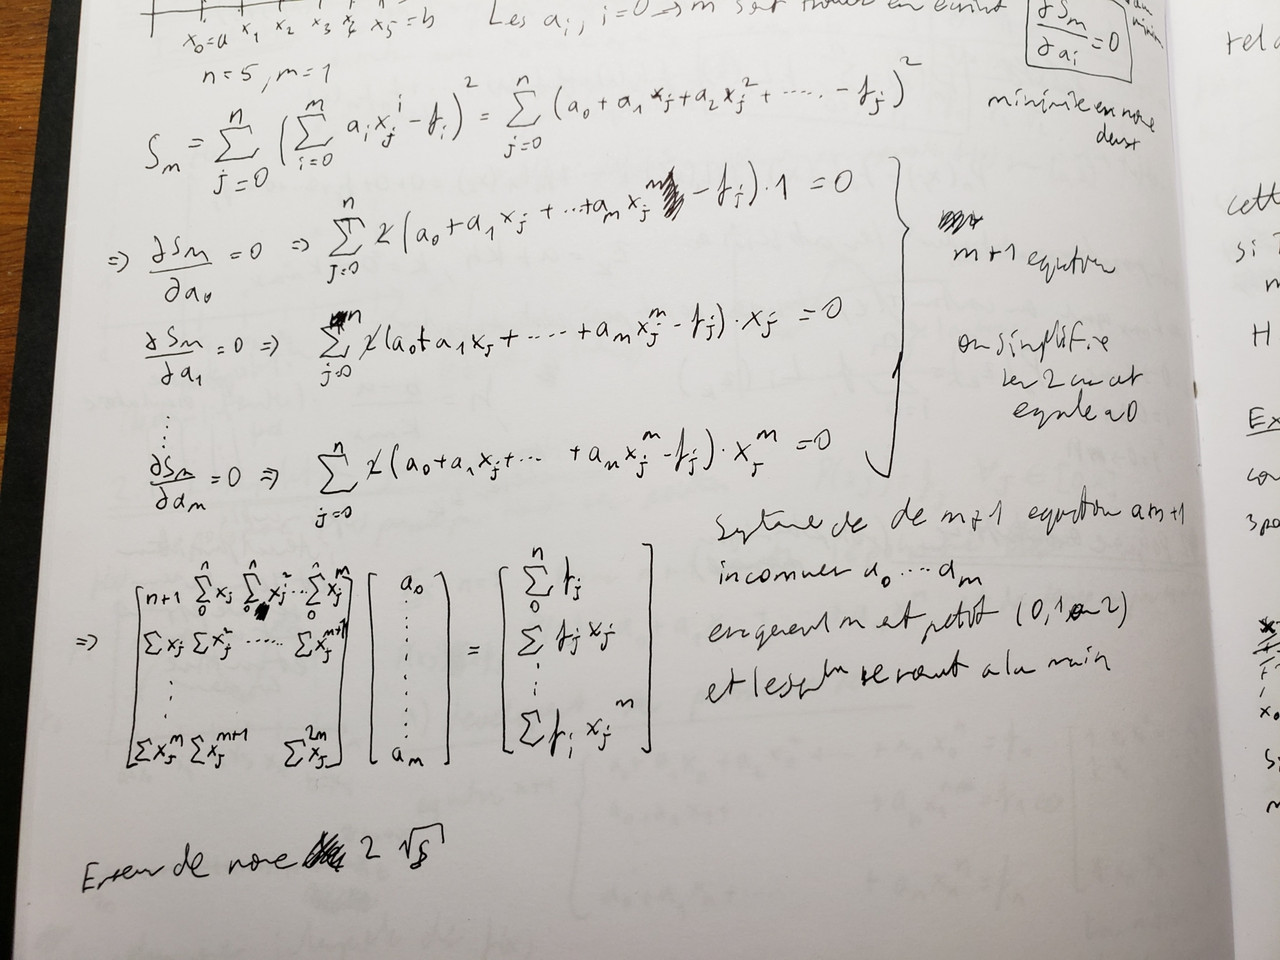

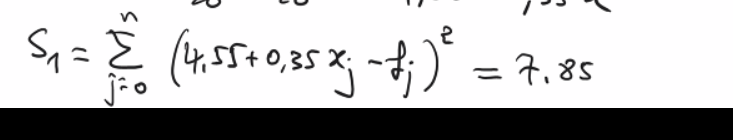

In [17]:
def MoindresCarees(data, degree):
    """returns the polynome as a list [a0, a1, a2, ..., am]"""
    if len(data) < 2: 
        print("To aproximate you need at least 2 points nothing has been done")
        return []
    if degree > len(data) - 2: 
        degree = len(data) - 2 # car le degree du polynome de degreee max nb points -2
        print("The degree was given higher than number of points - 2")
    M_to_solve = [[0 for i in range(degree+2)] for j in range(degree+1)] # +1 to include degree and +2 to include degree plus the result
    m = degree
    n = len(data)-1
    
    list_with_calculations = [0 for i in range(0, 2*m + 1)] # +1 since 2m is included 
    for i in range(0, 2*m + 1):
        for xj, fj in data:
            list_with_calculations[i] += xj**i 
    print(list_with_calculations)
    for row in range(len(M_to_solve)):
        for col in range(len(M_to_solve)):
            M_to_solve[row][col] = list_with_calculations[row+col]
        fj_xj_multiplication_sum = 0
        for xj, fj in data:
            fj_xj_multiplication_sum += fj* (xj**row) 
        M_to_solve[row][-1] = fj_xj_multiplication_sum
    solution = ResolutionGauss(M_to_solve)
    return solution

test_data = [(-2, 3), (0, 5), (4,8), (6, 5)]
assert(MoindresCarees(test_data, 1)==[4.55, 0.35])

def S_degree_moindre_carre_calcul(data, sol_moindres_carees):
    error = 0
    for xj, fj in data:
        error += ((ListToFunction(sol_moindres_carees,xj))-fj)**2
    return error

assert(S_degree_moindre_carre_calcul(test_data, MoindresCarees(test_data, 1)) == 7.850000000000001)

[4, 8, 56]
[4, 8, 56]


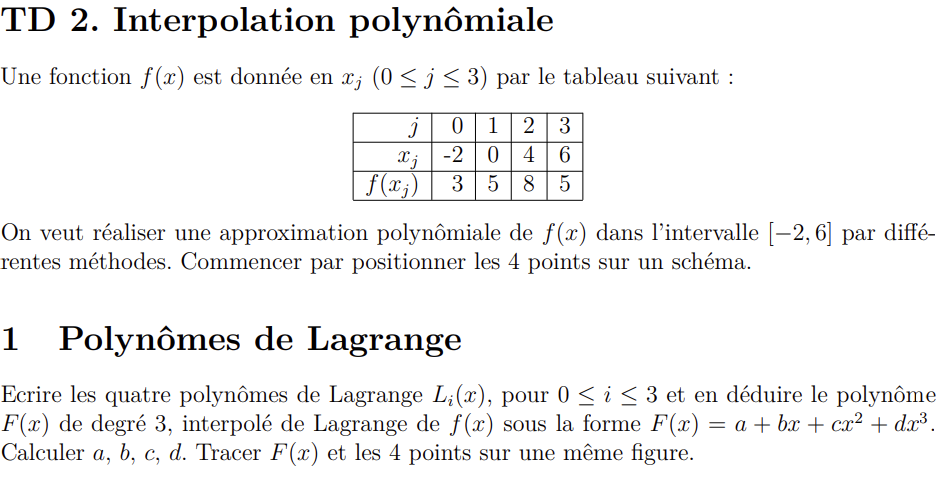

$$
L_i(x) = \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)} = \prod_{j=0, j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}
$$
Atention $j \neq i$ car sinon on a une division par zero

Le polynome interpole de Langrage des $n+1$ points $(x_j, f_j)$ on ecrit:
$$ P_n(x) = \sum_{i=0}^n f_i L_i(x)$$

$$
L_0(x) = \frac{(x)(x-4)(x-6)}{(-2)(-2-4)(-2-6)} = \frac{(x^2-4x)(x-6)}{(-2)(-6)(-8)}=\frac{x^3-6x^2-4x^2+24x}{-96}=\frac{24x-10x^2+x^3}{-96}
$$
$$
L_1(x) = \frac{(x+2)(x-4)(x-6)}{(2)(-4)(-6)}=\frac{(x^2-4x+2x-8)(x-6)}{48}=\frac{(x^2-2x-8)(x-6)}{48}=\frac{x^3-6x^2-2x^2+12x-8x+48}{48}=\frac{48+4x-8x^2+x^3}{48}
$$
$$
L_2(x) = \frac{(x+2)(x)(x-6)}{(4-(-2))(4)(4-6)}=\frac{(x+2)(x^2-6x)}{(6)(-8)}=\frac{x^3-6x^2+2x^2-12x}{-48}=\frac{-12x-4x^2+x^3}{-48}
$$
$$
L_3(x) = \frac{(x+2)(x)(x-4)}{(6-(-2))(6-0)(6-4)}=\frac{(x^2+2x)(x-4)}{(48)(2)}=\frac{x^3-4x^2+2x^2-8x}{96}=\frac{-8x-2x^2+x^3}{96} 
$$
<!--
$$
\Rightarrow F(x) = 3L_0(x)+5L_1(x)+8L_2(x)+5L_3(x) = \frac{24x-10x^2+x^3}{-32}+ 5\frac{x^3-8x^2+4x+48}{48}+ \frac{-12x-4x^2+x^3}{-6} + 5\frac{-8x-2x^2+x^3}{96} \\
$$
$$
\Rightarrow F(x) = -3\frac{24x-10x^2+x^3}{96}+ 10\frac{x^3-8x^2+4x+48}{96}- 16\frac{-12x-4x^2+x^3}{96} + 5\frac{-8x-2x^2+x^3}{96}\\
$$
$$
\Rightarrow F(x) = \frac{-72x+30x^2-3x^3+10x^3-80x^2+40x+480+12\cdot 16x+64x^2-16x^3-40x-10x^2+5x^3}{96} 
$$
-->
$$
\Rightarrow F(x) = \frac{480 -72x +40x + 192x-40x + 30x^2 -80x^2 + 64x^2 -10x^2 -3x^3 + 10x^3-16x^3+5x^3}{96} = \frac{480 + 120x + 4x^2 -4x^3}{96} 
$$ 
$$ 
\Rightarrow F(x) = 5 + \frac{5}{4}x + \frac{1}{24}x^2 -\frac{1}{24} x^3
$$

[5.0, 1.25, 0.04166666666666671, -0.04166666666666667]


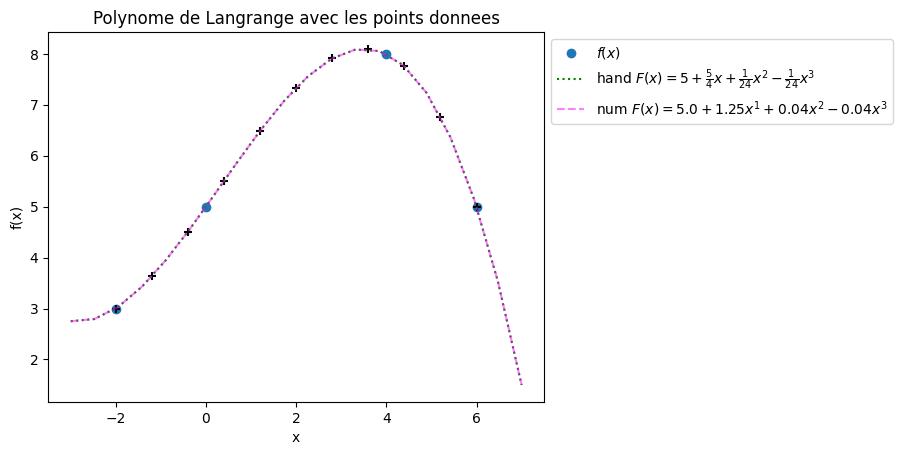

In [19]:
def MyPolynomeDeLangrangeF_x(x):
    return 5 + 5*x/4 + x*x/24 - x*x*x/24

data_TD1 = [(-2, 3), (0, 5), (4,8), (6, 5)]
x  = [i[0] for i in data_TD1 ]
fx = [i[1] for i in data_TD1 ]
plt.scatter(x, fx, label = "$f(x)$")

# Question 1
x_interval = np.linspace(-3, 7, 20)
plt.plot(x_interval, MyPolynomeDeLangrangeF_x(x_interval), alpha= 1, color = "green", label = "hand " + r"$F(x) = 5 + \frac{5}{4}x + \frac{1}{24}x^2 -\frac{1}{24} x^3 $", linestyle = ":")

num_cal_L = LangragePolynomial(data_TD1, len(data_TD1))
print(num_cal_L)
plt.plot(x_interval, ListToFunction(num_cal_L, x_interval), alpha = 0.5, color = "magenta", label = "num $F(x) = " + ListToStr(num_cal_L) + "$", linestyle = "--")

Donnees = np.loadtxt(open("lagrange.dat", 'rt').readlines())
plt.scatter(Donnees[:,0], Donnees[:,1], marker = "+", color = "k")

plt.xlabel('x')
plt.ylabel("f(x)")
plt.title("Polynome de Langrange avec les points donnees")
#plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()
plt.close()

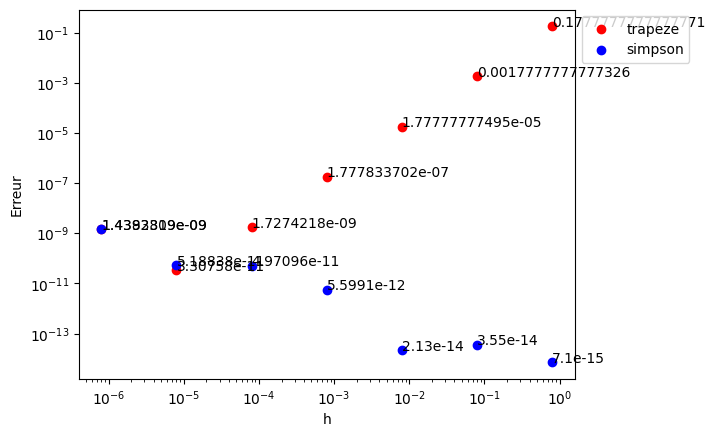

In [28]:
trap_err = np.loadtxt(open("trap_err.dat", 'rt').readlines())
simp_err = np.loadtxt(open("simp_err.dat", 'rt').readlines())

h   = trap_err[:,0]
err = trap_err[:,1]

for i, e in enumerate(err):
    plt.annotate(e, (h[i], err[i]))

plt.scatter(h, err, label = "trapeze", color = "red")

simp_err = np.loadtxt(open("simp_err.dat", 'rt').readlines())
h   = simp_err[:,0]
err = simp_err[:,1]
for i, e in enumerate(err):
    plt.annotate(e, (h[i], err[i]))

plt.scatter(h, err, label = "simpson", color = "blue")

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("Erreur")
plt.show()
plt.close()

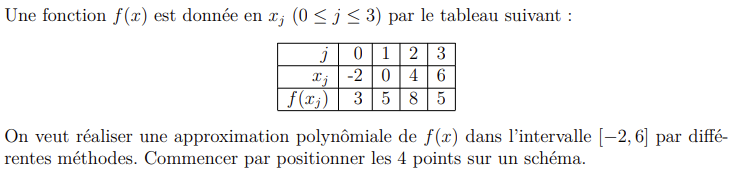
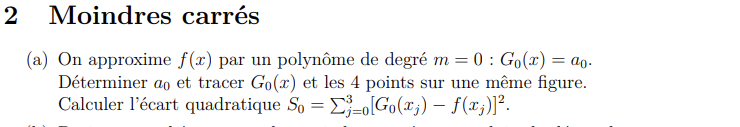
On mets en doute les points des donees et on essaye de metre la droite qui aproximine les donnees. ?

$m = 0$ (le degreee du polynome G_m(x))

$
G_0(x) = a_0
$ alors notre polynome qui aproche les points cest seulement une ligne horizontal de valeur $a_0$ 
$$
S_0 = \sum_{j=0}^{3}[G_0(x_j)-f(x_j)]^2 = [a_0 - f(x_0)]^2 + [a_0 - f(x_1)]^2  + [a_0 - f(x_2)]^2 + [a_0 - f(x_3)]^2 
$$
$$
\Rightarrow S_0 = [a_0 - 3]^2 + [a_0 - 5]^2 + [a_0 - 8]^2 + [a_0 - 5]^2 \\= a_0^2 - 6a_0 + 9 + a_0^2 -10a_0 +25 + a_0^2 -16a_0 + 64 + a_0^2 -10a_0 + 25\\
= 4a_0^2 -42a_0 + 123
$$
Pour minimiser lerreur on veux que a chaque $\frac{\partial S_m}{\partial a_i} = 0$ comme m = 0 on a besoin de faire une seule fois
$$
\frac{\partial S_m}{\partial a_i} = 0 \Rightarrow \frac{\partial (4a_0^2 -42a_0 + 123)}{\partial a_0} = 8a_0 - 42 \Rightarrow 8a_0 - 42 = 0 \Rightarrow a_0 = 5.25
$$
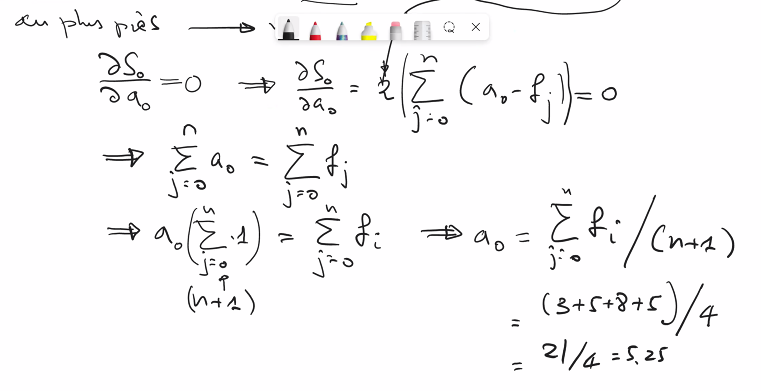
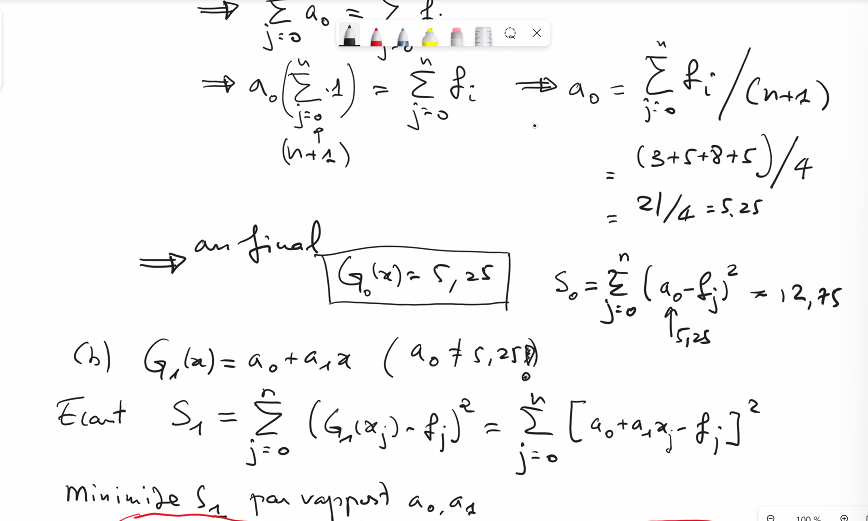

Ecart quadratique 

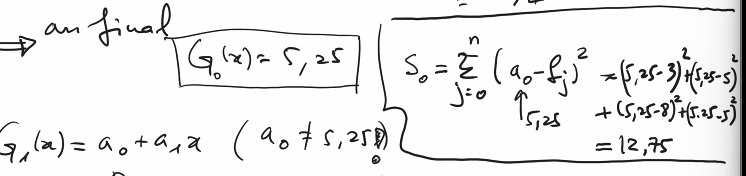

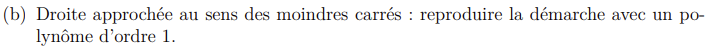

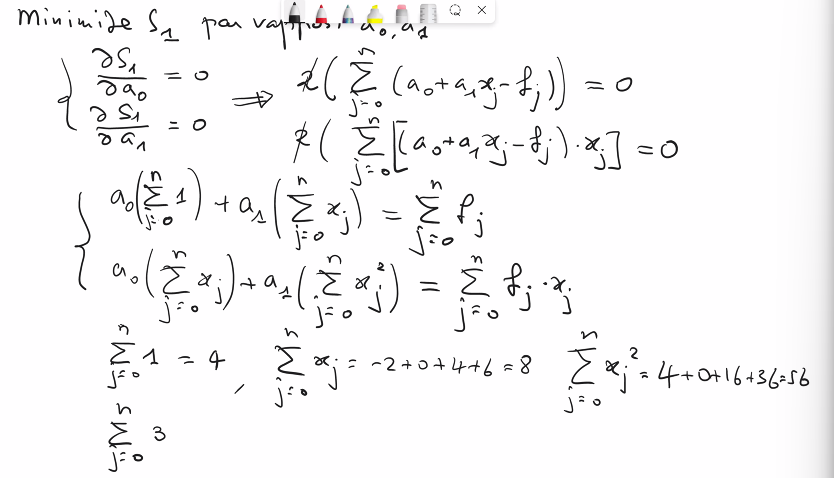
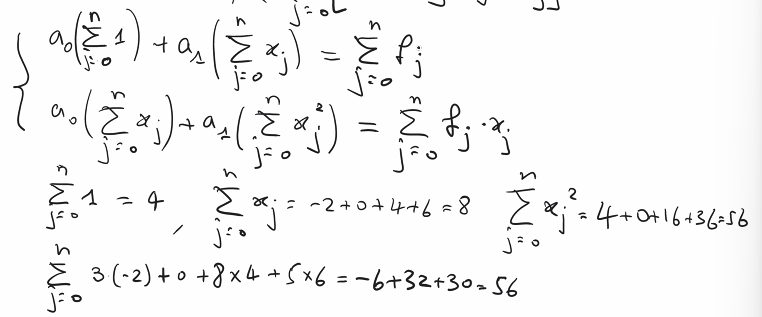

$m = 1 \Rightarrow G_m(x) = G_1(x) = a_0 + a_1 x$
$$
S_0= \sum_{j=0}^{3}[a_0 -f(x_j)]^2\\
S_1= \sum_{j=0}^{3}[a_0 + a_1x_j-f(x_j)]^2
$$
$$
\frac{\partial S_0}{\partial a_0} = 0 \\
\frac{\partial S_1}{\partial a_1} = 0 
$$
O utilise le regle de derivation pour faciliter notre vie et on peux diviser les deux cotes par 2 et comme $0/2 = 0$ les 2 se simplifie
$$
\Rightarrow \frac{\partial S_0}{\partial a_0} = \sum_{j=0}^{3}2[a_0 -f(x_j)]^{'}[a_0 -f(x_j)]^{2-1} = 2\sum_{j=0}^{3}[a_0 -f(x_j)] = 0\\
\frac{\partial S_1}{\partial a_1} = 2\sum_{j=0}^{3}[a_0 + a_1x_j-f(x_j)][x_j] = 0
$$
Les 2 se simplifie
$$
\sum_{j=0}^{3}[a_0 -f(x_j)] = 0\\
\sum_{j=0}^{3}[a_0 + a_1x_j-f(x_j)][x_j] = 0
$$ 
$$
\Rightarrow \sum_{j=0}^{3}[a_0 -f(x_j)] = 3a_0 - 3 - 5 - 8 -5= 3a_0-21\\
3a_0 -21 = 0  \Rightarrow a_0 = 7
$$
On fait de mem facon pour lautre.
Et a la fin on a cette systeme dequation a resoudre.
$$

    \begin{bmatrix} 
        4 & 8  \\ 
        8 & 56 \\
    \end{bmatrix} 
    \begin{bmatrix} 
        a_0\\ a_1\\ 
    \end{bmatrix} = \begin{bmatrix} 21\\ 56\\  \end{bmatrix}
$$
Les choses en rouge cest tres important!

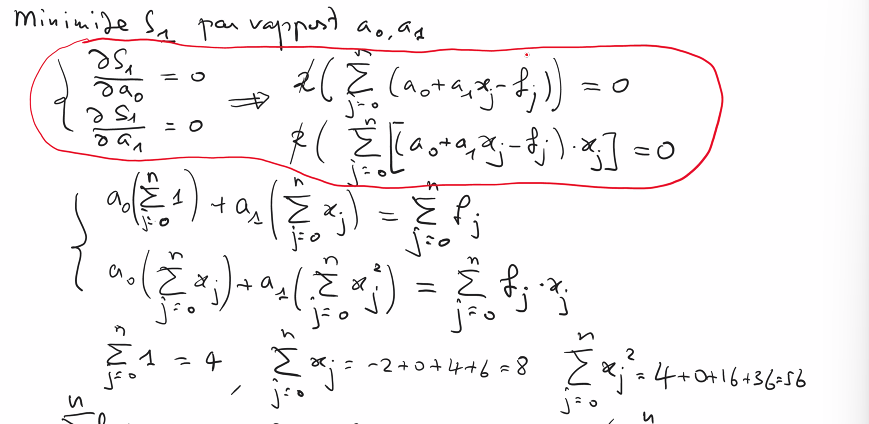
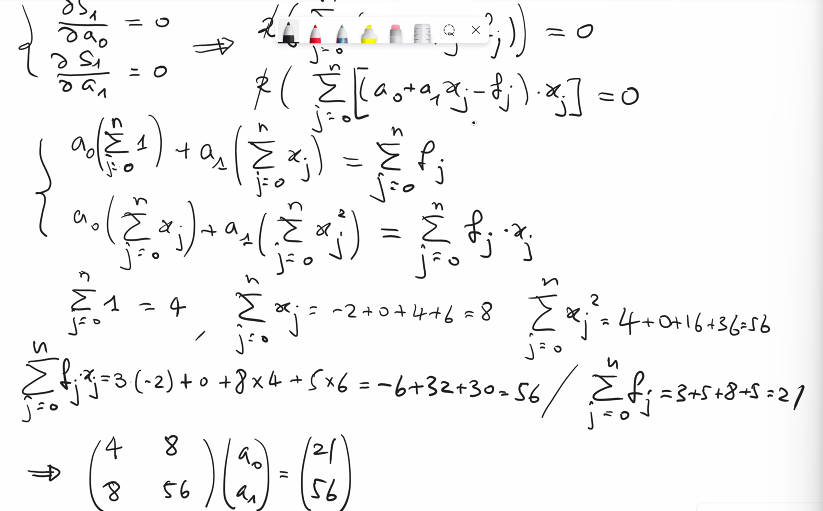
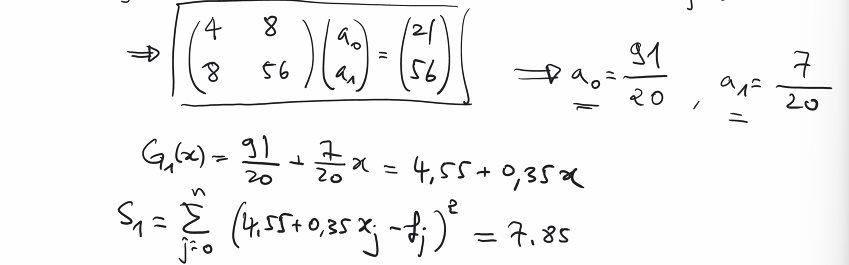

On vois bien que plus en augmente le m plus lerreur diminue. Ecart quadratique descend.

[4, 8, 56]
[4, 8, 56, 272, 1568]


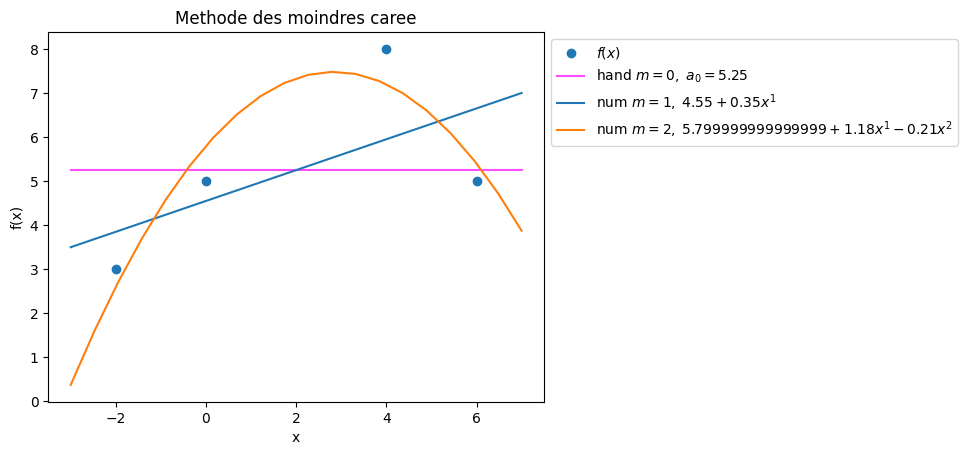

In [ ]:
a_0 = 5.25
G_0 = [a_0] 
x_TD1  = [i[0] for i in data_TD1 ]
fx_TD1 = [i[1] for i in data_TD1 ]
plt.scatter(x_TD1, fx_TD1, label = "$f(x)$")

plt.plot(x_interval, [ListToFunction(G_0, i) for i in x_interval], alpha = 0.7, color = "magenta", label = r"hand $m=0,\; a_0 = 5.25$")
moindre_carree_d1 = MoindresCarees(data_TD1, 1)
plt.plot(x_interval, ListToFunction(moindre_carree_d1, x_interval),  label = r"num $m=1,\;" + ListToStr(moindre_carree_d1) + "$")
moindre_carree_d2 = MoindresCarees(data_TD1, 2)
plt.plot(x_interval, ListToFunction(moindre_carree_d2, x_interval),  label = r"num $m=2,\;" + ListToStr(moindre_carree_d2) + "$")
plt.xlabel('x')
plt.ylabel("f(x)")
plt.title("Methode des moindres caree")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()
plt.close()

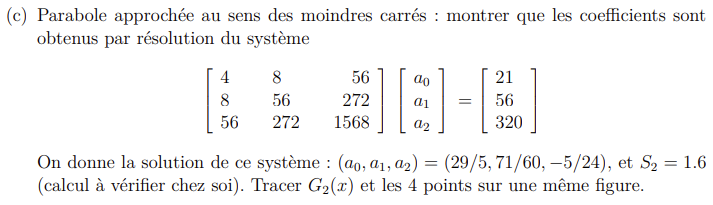

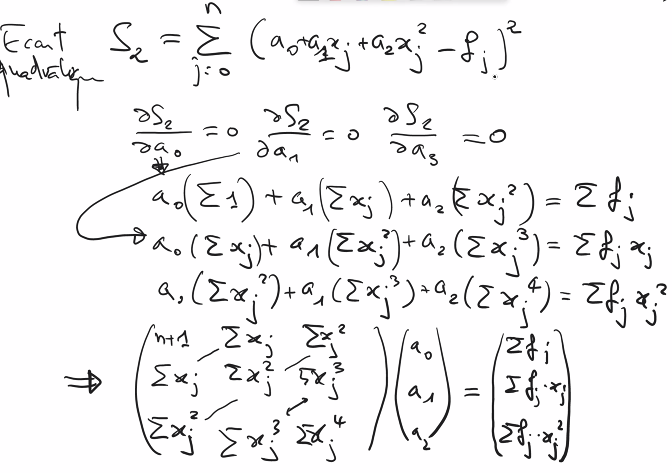
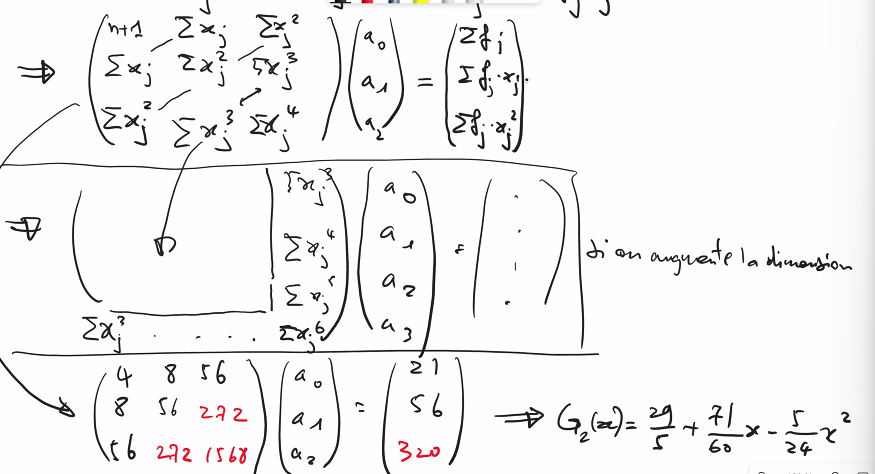
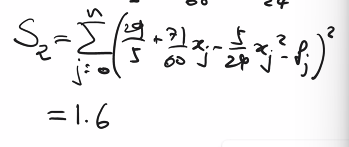

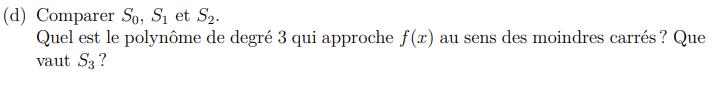
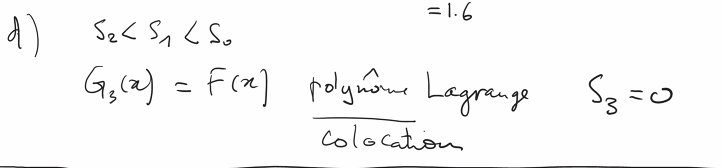
$$
S_2 < S_1 < S_0
$$
Plus on augmente le degree mieux nos approximations devient

## 2.4 Methode miniMax
Methode des moindre carees cest le plus nature mais pas forcement le mieux que on peux utiliser. Donc on a la methode de miniMax. Dans miniMax tout les points a un poids et ca fait tel que cest mieux aproximatif pour tout les points. Toute les points ont le meme distance a la ligne. 

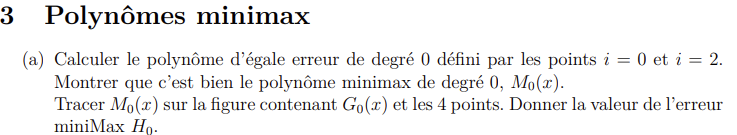
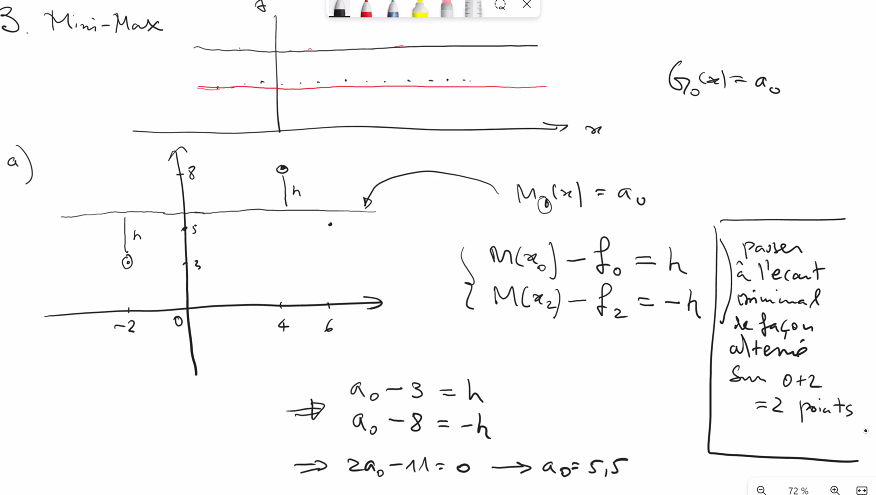
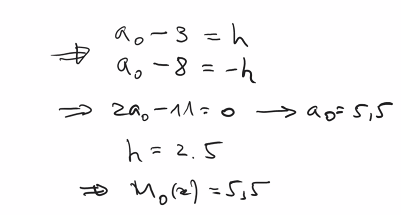

$M_0(x)=5.5$ est le mini-max si on choisit 0,2
On verifie si 

$|h_1| < h => h_1 = 5.5 - 5 = 0.5$

$|h_3|< h => h_3 = 5.5 - 5 = 0.5$ 

Donc ca marche => $M_0(x)=5.5$ est bien mini-max degree 0

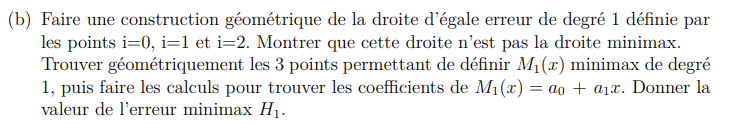

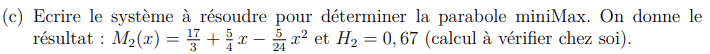

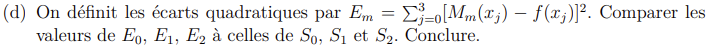